In [1]:
%matplotlib inline 

import os
import sys
sys.path.append(os.path.abspath('../src/'))

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.plotting_context('paper')

from wordGraph import *
from textDataset import *
from models import Net
from trainner import Trainner

from torchvision import transforms
import networkx as nx

import torch.nn as nn

In [2]:
subjects=['biology', 'cooking', 'crypto', 'diy', 'robotics', 'travel']
path2data = '../data/'
batch_size = 32

In [3]:
df = TextDataset(subjects, path2data + 'train/', is_train = True)

In [4]:
df.data.head()

,id,title,content,tags,subject
0,1,What is the criticality of the ribosome bindin...,"<p>In prokaryotic translation, how critical fo...",ribosome binding-sites translation synthetic-b...,biology
1,2,How is RNAse contamination in RNA based experi...,<p>Does anyone have any suggestions to prevent...,rna biochemistry,biology
2,3,Are lymphocyte sizes clustered in two groups?,<p>Tortora writes in <em>Principles of Anatomy...,immunology cell-biology hematology,biology
3,4,How long does antibiotic-dosed LB maintain goo...,<p>Various people in our lab will prepare a li...,cell-culture,biology
4,5,Is exon order always preserved in splicing?,<p>Are there any cases in which the splicing m...,splicing mrna spliceosome introns exons,biology


In [5]:
df.process_data(lemmalize = False, stem = False)

In [6]:
df.data.head()

,id,title,content,tags,subject,data
0,1,What is the criticality of the ribosome bindin...,"<p>In prokaryotic translation, how critical fo...",ribosome binding-sites translation synthetic-b...,biology,In prokaryotic translation critical efficient ...
1,2,How is RNAse contamination in RNA based experi...,<p>Does anyone have any suggestions to prevent...,rna biochemistry,biology,Does anyone suggestions prevent RNAse contamin...
2,3,Are lymphocyte sizes clustered in two groups?,<p>Tortora writes in <em>Principles of Anatomy...,immunology cell-biology hematology,biology,Tortora writes Principles Anatomy Physiology L...
3,4,How long does antibiotic-dosed LB maintain goo...,<p>Various people in our lab will prepare a li...,cell-culture,biology,Various people lab prepare liter LB add kanamy...
4,5,Is exon order always preserved in splicing?,<p>Are there any cases in which the splicing m...,splicing mrna spliceosome introns exons,biology,Are cases splicing machinery constructs mRNA e...


In [7]:
g_tags = WordsGraph(df.data)
g_data = WordsGraph(df.data, col = 'content', weight = 500)

In [8]:
g_tags.words_df.sort_values('categories_appears', ascending=False).head()

,biology,cooking,crypto,diy,robotics,travel,categories_appears
untagged,6,6,1,35,7,1,6
software,44,5,0,12,54,10,5
children,10,8,0,0,2,216,4
safety,15,30,0,248,0,416,4
history,60,29,35,0,0,39,4


(-1.0432441031932831,
 1.1757139956951141,
 -1.1060777246952056,
 1.2001250326633452)

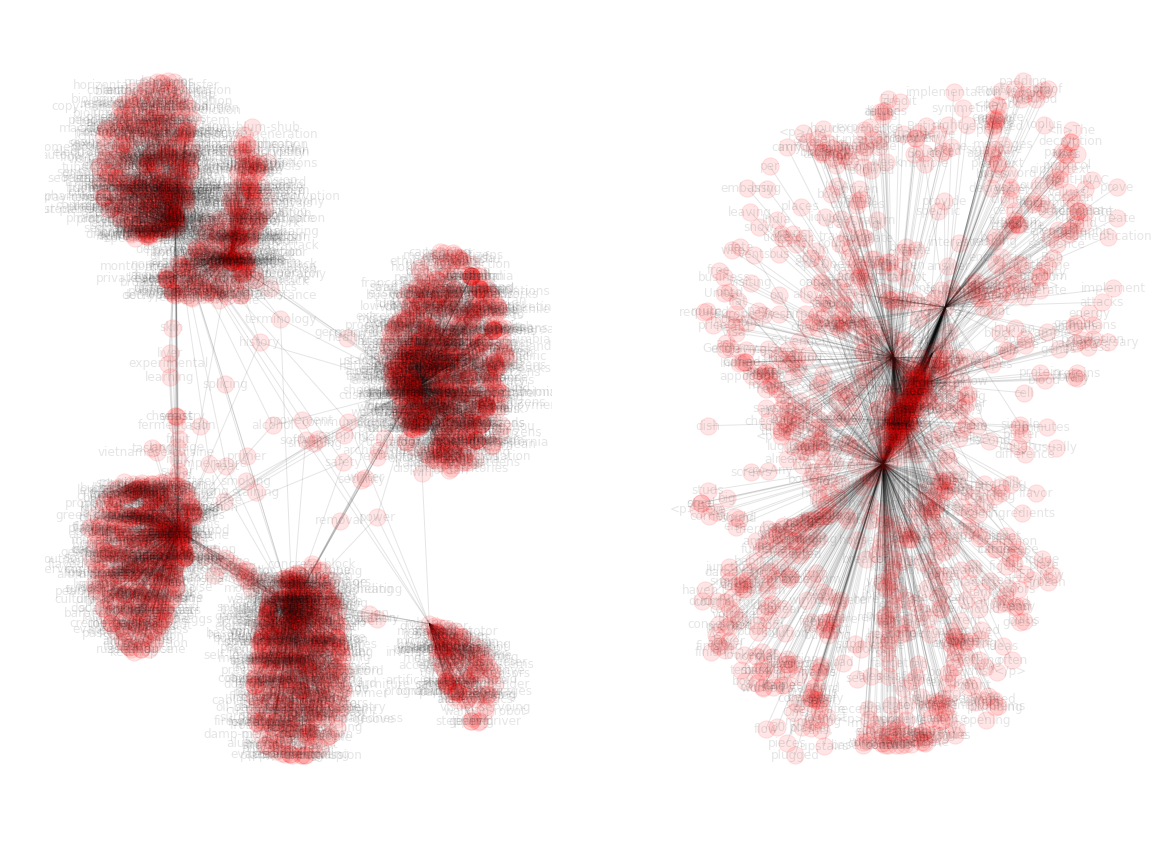

In [10]:
fig = plt.figure(figsize=[20,15])
plt.subplot(1,2,1)
nx.draw_networkx(g_tags.g,alpha=0.1)
plt.axis('off')
plt.subplot(1,2,2)
nx.draw_networkx(g_data.g,alpha=0.1)
plt.axis('off')
#fig.savefig('../figures/word_graph.jpg')

In [26]:
data_transforms = {
    'train': transforms.Compose([
        transforms.ToTensor()
    ]),
    'valid': transforms.Compose([
        transforms.ToTensor()
    ]),
}

In [27]:
dsets = {
    'train': TextDataset(subjects, path2data + 'train/',  transform = data_transforms['train'], is_train = True),
    'valid': TextDataset(subjects, path2data + 'train/',  transform = data_transforms['valid'], is_valid=True),
    'test':  TextDataset(subjects, path2data + 'test/',  transform = data_transforms['valid'], is_test=True),
}

In [28]:
dset_loaders = create_dataLoader(dsets, batch_size)

In [29]:
Net = Net(1000, 10)
print(Net)

Net (
  (fc1): Linear (1000 -> 128)
  (fc2): Linear (128 -> 32)
  (fc3): Linear (32 -> 10)
)


In [30]:
trainner = Trainner()